# ashrae energy eda

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

## read in train data

In [6]:
train = pd.read_csv('train.csv')
weather = pd.read_csv('weather_train.csv')
building = pd.read_csv('building_metadata.csv')

train = reduce_mem_usage(train)
weather = reduce_mem_usage(weather)
building = reduce_mem_usage(building)

Mem. usage decreased to 289.19 Mb (53.1% reduction)
Mem. usage decreased to  3.07 Mb (68.1% reduction)
Mem. usage decreased to  0.03 Mb (60.3% reduction)


In [4]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [7]:
train.shape

(20216100, 4)

In [8]:
uniq_build = np.unique(train.building_id)
uniq_meter = np.unique(train.meter)

In [10]:
print('data has {} reads with {} buildings and {} meters.'.format(train.shape[0], len(uniq_build), len(uniq_meter)))

data has 20216100 reads with 1449 buildings and 4 meters.


## Plot meter reads

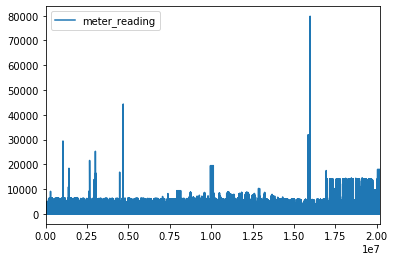

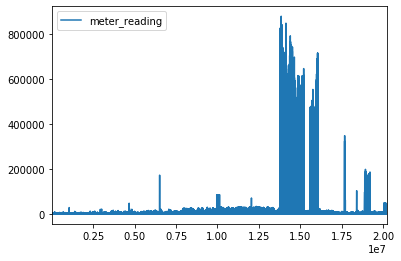

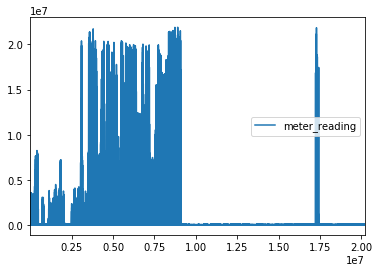

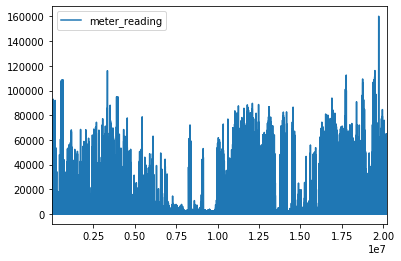

In [10]:
for j in uniq_meter:
    train[train.meter == j].plot(y = 'meter_reading')

## weather data

In [6]:
weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [7]:
weather.shape

(139773, 9)

In [8]:
start = min(weather.timestamp[[s == 0 for s in weather.site_id]])
end = max(weather.timestamp[[s == 0 for s in weather.site_id]])
uniq_site = np.unique(weather.site_id)


print('weather data goes between {} and {} across {} unique sites.'.format(start, end, len(uniq_site)))

weather data goes between 2016-01-01 00:00:00 and 2016-12-31 23:00:00 across 16 unique sites.


## Plots
### air temperature

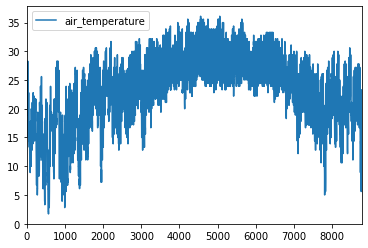

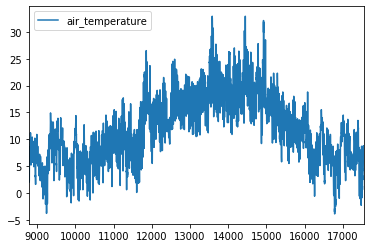

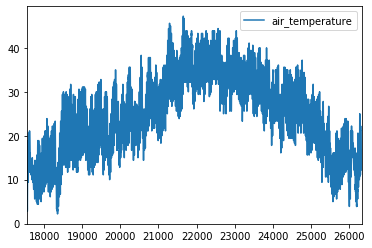

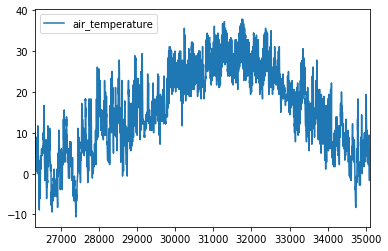

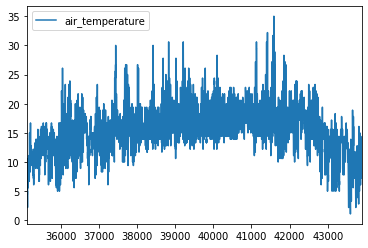

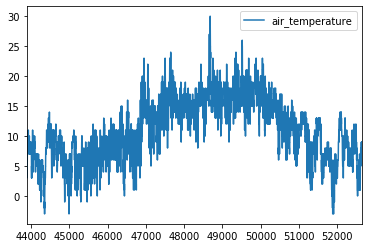

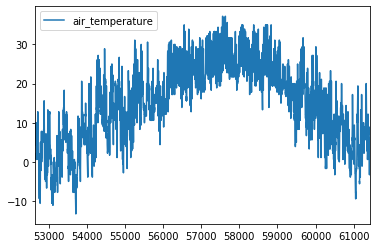

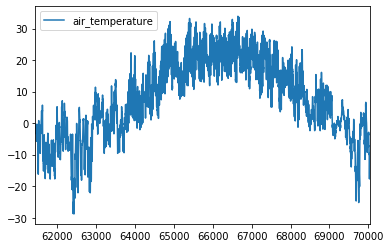

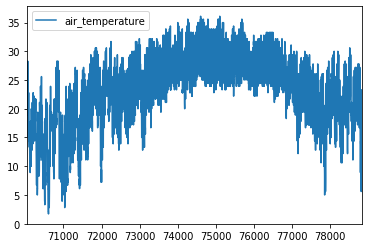

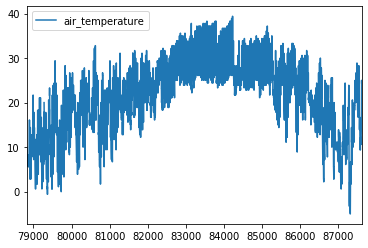

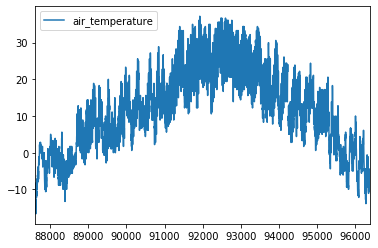

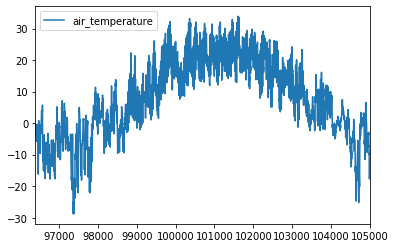

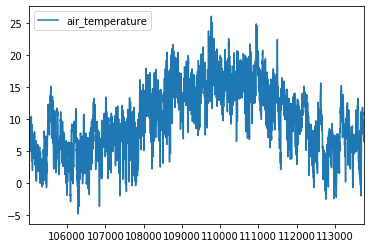

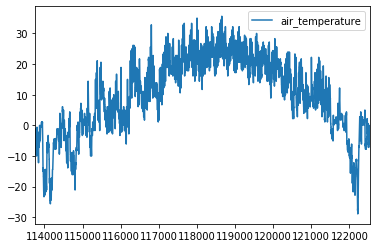

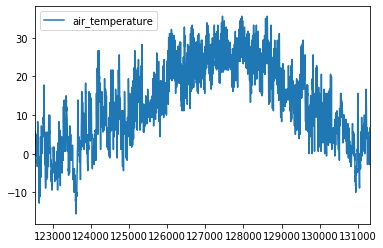

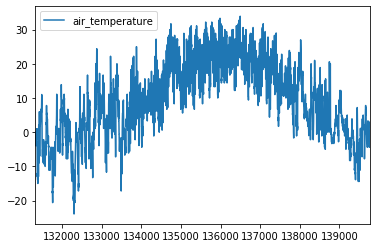

In [9]:
for i in range(0, len(uniq_site)):
    weather[[s == i for s in weather.site_id]].plot(y = 'air_temperature')

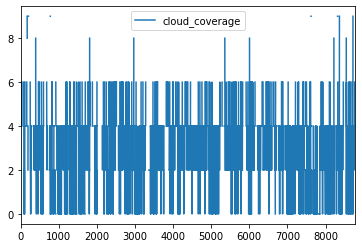

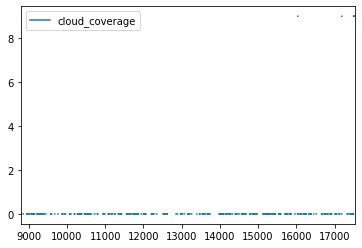

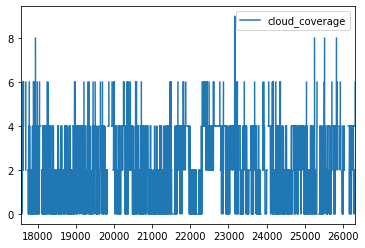

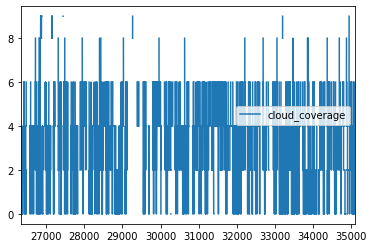

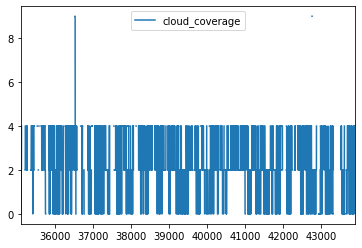

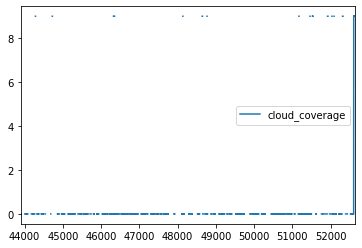

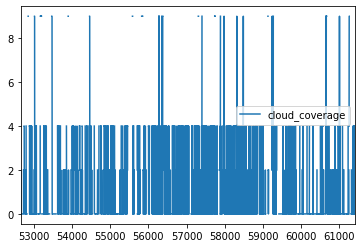

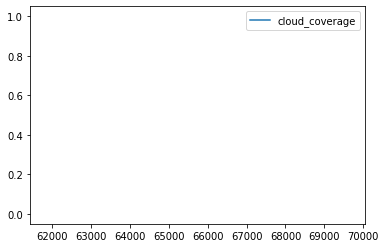

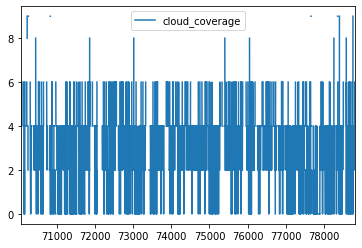

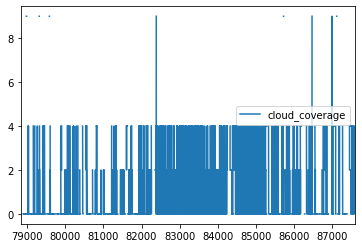

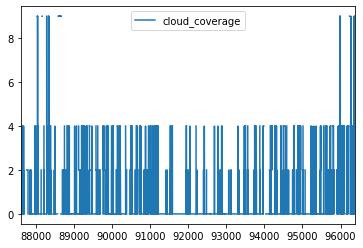

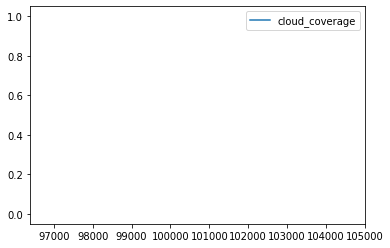

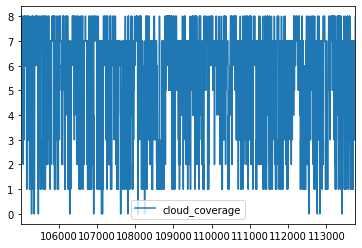

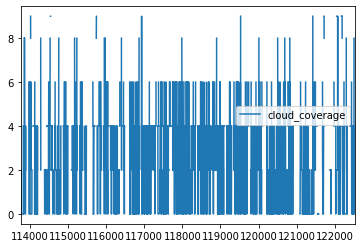

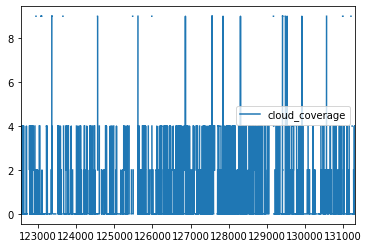

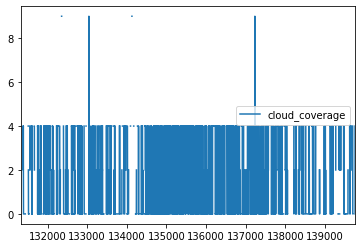

In [10]:
for i in range(0, len(uniq_site)):
    weather[[s == i for s in weather.site_id]].plot(y = 'cloud_coverage')

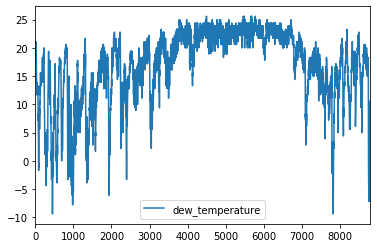

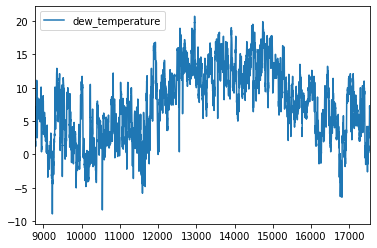

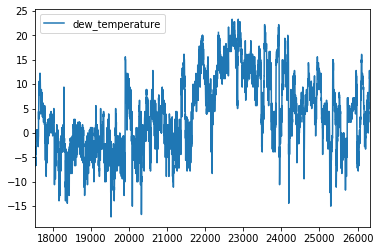

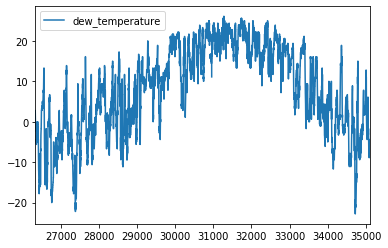

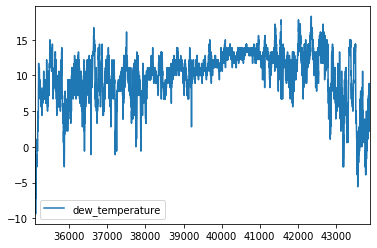

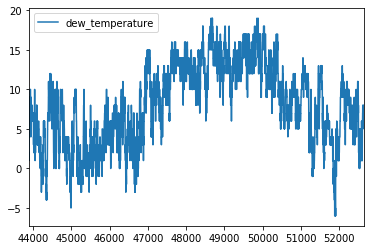

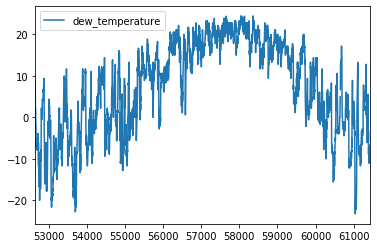

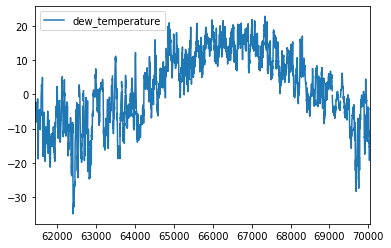

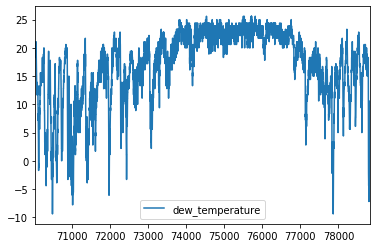

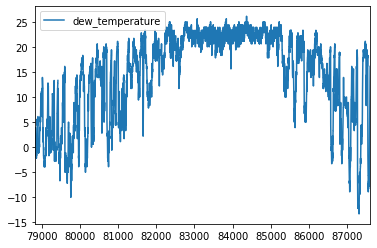

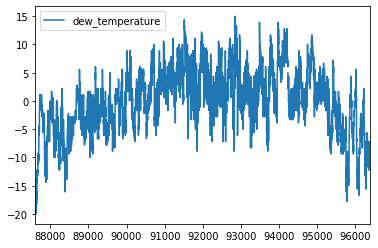

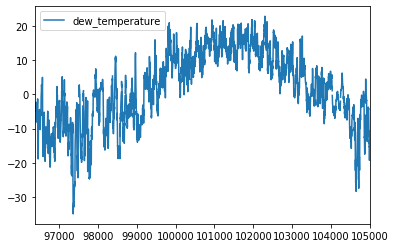

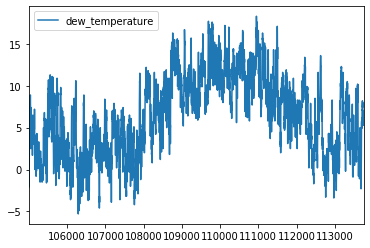

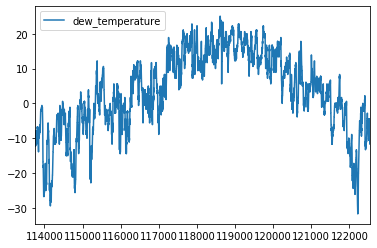

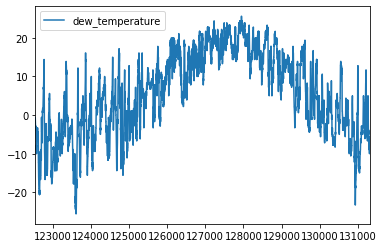

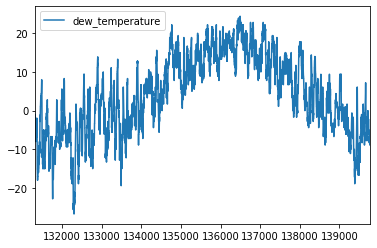

In [11]:
for i in range(0, len(uniq_site)):
    weather[[s == i for s in weather.site_id]].plot(y = 'dew_temperature')

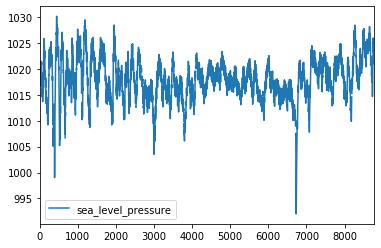

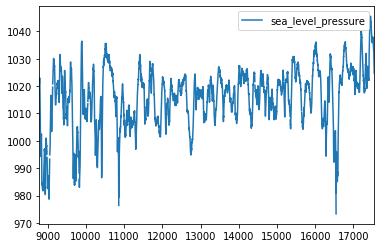

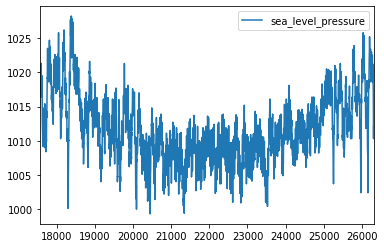

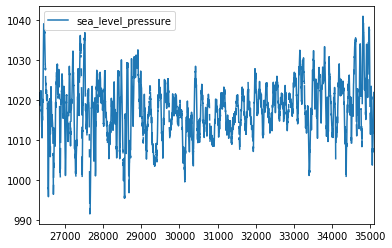

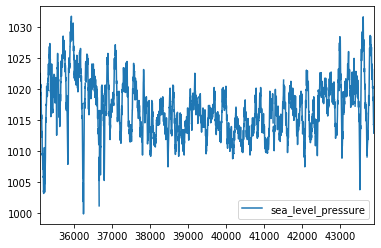

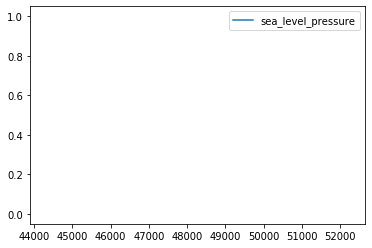

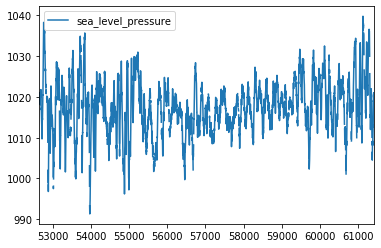

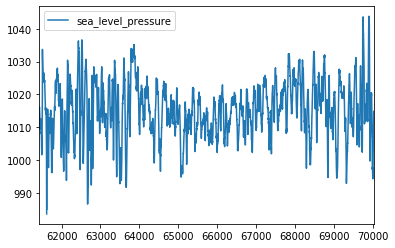

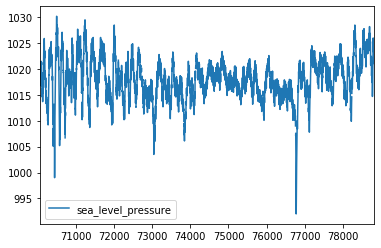

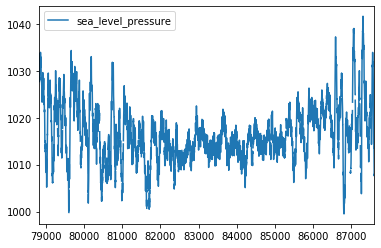

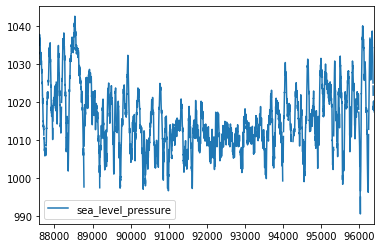

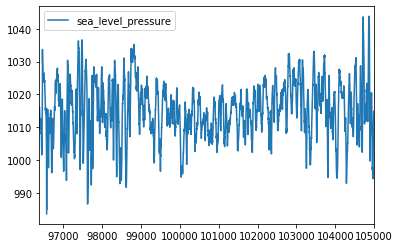

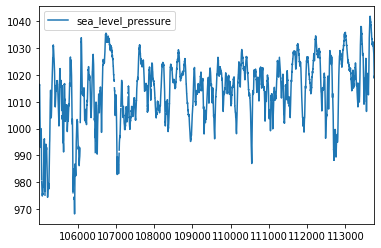

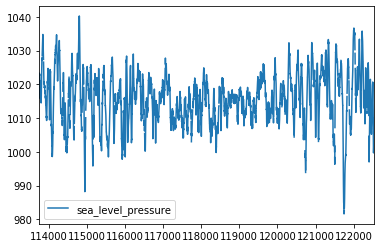

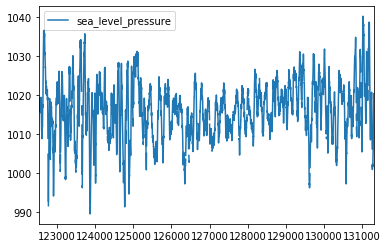

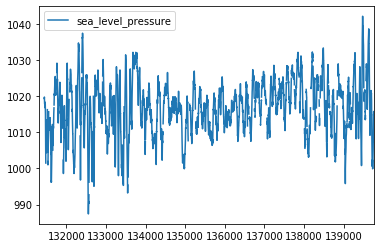

In [12]:
for i in range(0, len(uniq_site)):
    weather[[s == i for s in weather.site_id]].plot(y = 'sea_level_pressure')

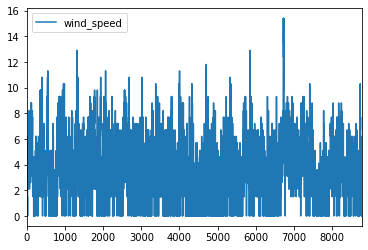

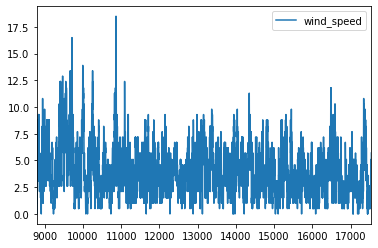

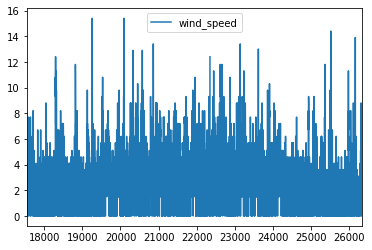

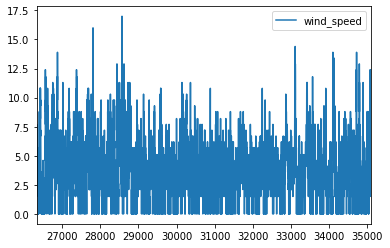

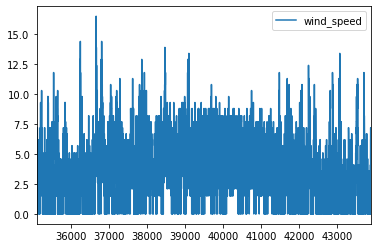

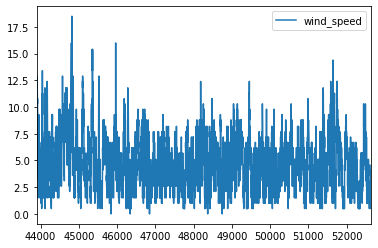

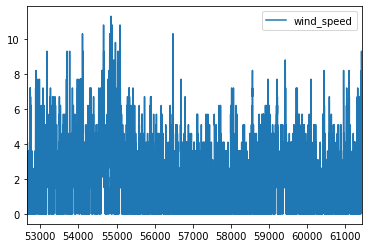

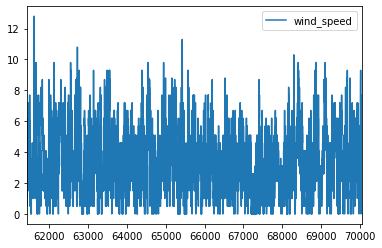

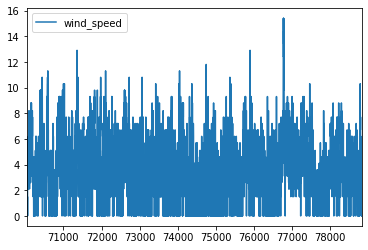

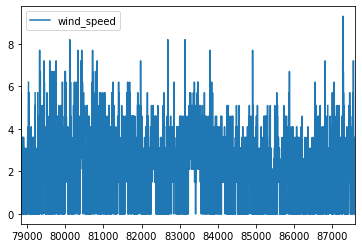

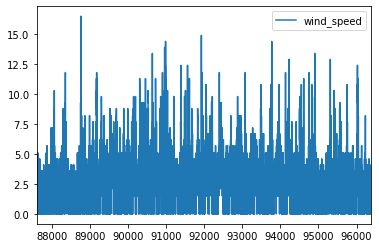

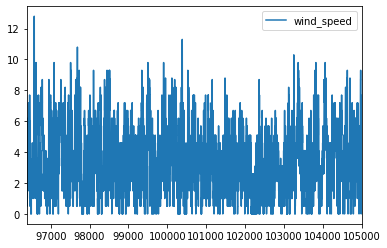

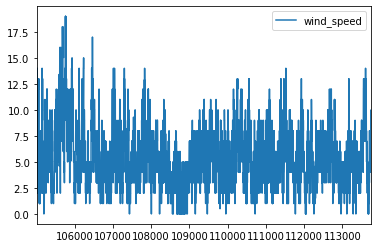

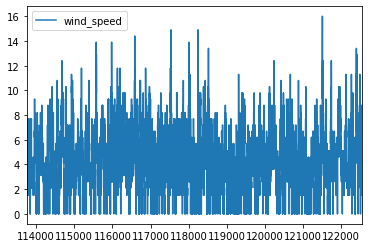

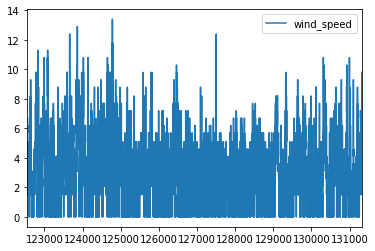

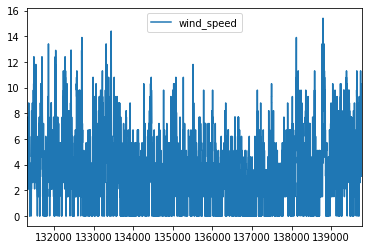

In [13]:
for i in range(0, len(uniq_site)):
    weather[[s == i for s in weather.site_id]].plot(y = 'wind_speed')

## building & site data

In [10]:
building.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [15]:
building.shape

(1449, 6)

In [17]:
np.unique(building.site_id)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [11]:
np.unique(building.primary_use)

array(['Education', 'Entertainment/public assembly',
       'Food sales and service', 'Healthcare', 'Lodging/residential',
       'Manufacturing/industrial', 'Office', 'Other', 'Parking',
       'Public services', 'Religious worship', 'Retail', 'Services',
       'Technology/science', 'Utility', 'Warehouse/storage'], dtype=object)